In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Ted\Desktop\Juju\DEV\credit-risk-analysis\data\data.csv')

In [3]:
# 1. Create Aggregate Features
# Create aggregate features for each customer
aggregate_features = data.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),
    AverageTransactionAmount=('Amount', 'mean'),
    TransactionCount=('TransactionId', 'count'),
    StdDevTransactionAmount=('Amount', 'std')
).reset_index()

# Display the first few rows of the aggregated features
aggregate_features.head()


,CustomerId,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdDevTransactionAmount
0,CustomerId_1,-10000.0,-10000.000000,1,NaN
1,CustomerId_10,-10000.0,-10000.000000,1,NaN
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146


In [4]:
# 2. Extract Features
# Extract new features from TransactionStartTime
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
data['TransactionHour'] = data['TransactionStartTime'].dt.hour
data['TransactionDay'] = data['TransactionStartTime'].dt.day
data['TransactionMonth'] = data['TransactionStartTime'].dt.month
data['TransactionYear'] = data['TransactionStartTime'].dt.year

# Display the first few rows of the dataset with new features
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018


In [5]:
# 3. Encode Categorical Variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding for categorical variables
categorical_columns = ['CurrencyCode', 'ProviderId', 'ProductCategory', 'ChannelId']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
label_encoded_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProductId']
for col in label_encoded_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the first few rows of the dataset with encoded features
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProductId,Amount,Value,TransactionStartTime,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,78150,46980,2490,3535,2584,256,1,1000.0,1000,2018-11-15 02:18:49+00:00,...,False,False,False,False,False,False,False,False,True,False
1,75821,31755,3219,2366,2584,256,19,-20.0,20,2018-11-15 02:19:08+00:00,...,True,False,False,False,False,False,False,True,False,False
2,39888,60272,2713,996,2806,256,0,500.0,500,2018-11-15 02:44:21+00:00,...,False,False,False,False,False,False,False,False,True,False
3,48738,1797,3351,974,3733,256,11,20000.0,21800,2018-11-15 03:32:55+00:00,...,False,False,False,False,False,False,True,False,True,False
4,41364,48941,3219,2366,3733,256,19,-644.0,644,2018-11-15 03:34:21+00:00,...,True,False,False,False,False,False,False,True,False,False


In [10]:
# 4. Handle Missing Values
# Handling missing values using imputation 
data.fillna(data.mean(), inplace=True)


In [11]:
# 5. Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns for normalization/standardization
numerical_columns = ['Amount', 'Value', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Standardize numerical features
standardizer = StandardScaler()
data[numerical_columns] = standardizer.fit_transform(data[numerical_columns])

# Display the first few rows of the dataset with scaled features
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProductId,Amount,Value,TransactionStartTime,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,78150,46980,2490,3535,2584,256,1,-0.046371,-0.072291,2018-11-15 02:18:49+00:00,...,False,False,False,False,False,False,False,False,True,False
1,75821,31755,3219,2366,2584,256,19,-0.054643,-0.080251,2018-11-15 02:19:08+00:00,...,True,False,False,False,False,False,False,True,False,False
2,39888,60272,2713,996,2806,256,0,-0.050426,-0.076352,2018-11-15 02:44:21+00:00,...,False,False,False,False,False,False,False,False,True,False
3,48738,1797,3351,974,3733,256,11,0.107717,0.096648,2018-11-15 03:32:55+00:00,...,False,False,False,False,False,False,True,False,True,False
4,41364,48941,3219,2366,3733,256,19,-0.059704,-0.075183,2018-11-15 03:34:21+00:00,...,True,False,False,False,False,False,False,True,False,False


Default Estimator and WoE Binning

In [13]:
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime']).dt.tz_localize(None)


In [14]:
# 1. Construct Default Estimator (Proxy)

# Calculate RFMS scores for each user
rfms_scores = data.groupby('CustomerId').agg(
    Recency=('TransactionStartTime', lambda x: (pd.Timestamp.now() - x.max()).days),
    Frequency=('TransactionId', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

# Display the first few rows of RFMS scores
rfms_scores.head()



,CustomerId,Recency,Frequency,Monetary
0,0,2022,1,-0.135580
1,1,2022,1,-0.135580
2,2,2028,5,-0.110207
3,3,1965,11,-0.565027
4,4,1950,6,-0.164688


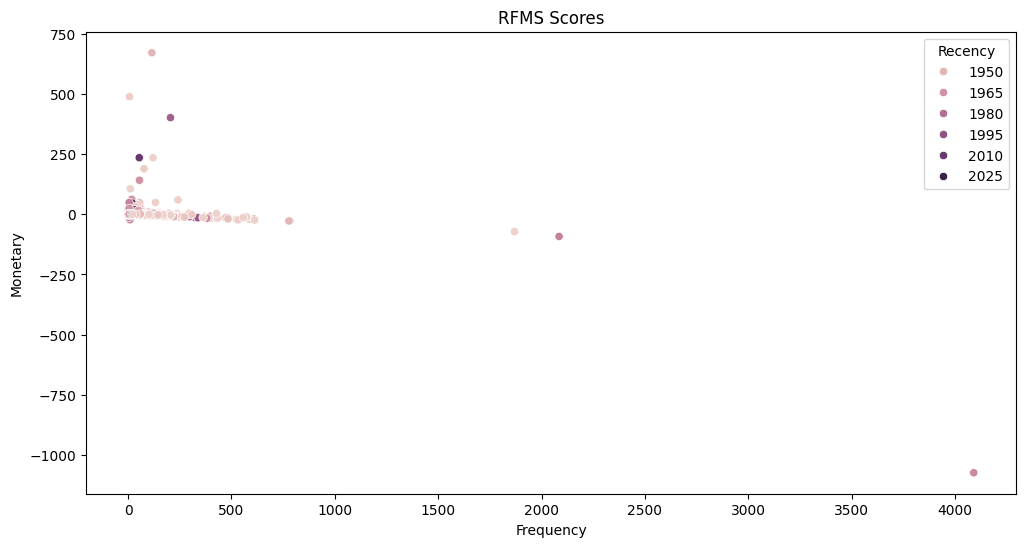

In [15]:
# Visualize RFMS scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Recency', data=rfms_scores)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('RFMS Scores')
plt.show()


In [26]:
# 2. Assign Good and Bad Labels
# Define boundary values
high_freq_boundary = rfms_scores['Frequency'].quantile(0.75)
high_monetary_boundary = rfms_scores['Monetary'].quantile(0.75)
low_recency_boundary = rfms_scores['Recency'].quantile(0.25)

# Assign labels based on boundary
rfms_scores['Label'] = 'Good'
rfms_scores.loc[(rfms_scores['Frequency'] <= high_freq_boundary) & 
                (rfms_scores['Monetary'] <= high_monetary_boundary) & 
                (rfms_scores['Recency'] >= low_recency_boundary), 'Label'] = 'Bad'

# Display the first few rows of RFMS scores with labels
rfms_scores


,CustomerId,Recency,Frequency,Monetary,Label
0,0,2022,1,-0.135580,Bad
1,1,2022,1,-0.135580,Bad
2,2,2028,5,-0.110207,Bad
3,3,1965,11,-0.565027,Bad
4,4,1950,6,-0.164688,Bad
...,...,...,...,...,...
3737,3737,1944,6,-0.164688,Bad
3738,3738,1964,5,-0.110207,Bad
3739,3739,1940,101,-1.091831,Good
3740,3740,2006,17,0.201098,Good


In [ ]:
# 3. Perform WoE Binning

In [23]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Ted\Desktop\Juju\DEV\credit-risk-analysis\data\data.csv')

In [25]:
import numpy as np
import pandas as pd

def calculate_woe_iv(data, feature, target):
    # Initialize list to store WoE and IV values
    lst = []
    
    # Loop through each unique category
    for i in range(data[feature].nunique()):
        val = list(data[feature].unique())[i]
        df = data[data[feature] == val]
        good = len(df[df[target] == 0])
        bad = len(df[df[target] == 1])
        lst.append([val, good, bad])
    
    # Create a DataFrame to hold WoE and IV values
    woe_df = pd.DataFrame(lst, columns=[feature, 'Good', 'Bad'])
    woe_df['Distr_Good'] = woe_df['Good'] / woe_df['Good'].sum()
    woe_df['Distr_Bad'] = woe_df['Bad'] / woe_df['Bad'].sum()
    woe_df['WoE'] = np.log(woe_df['Distr_Good'] / woe_df['Distr_Bad'])
    woe_df['IV'] = (woe_df['Distr_Good'] - woe_df['Distr_Bad']) * woe_df['WoE']
    
    # Calculate total Information Value
    iv = woe_df['IV'].sum()
    
    return woe_df, iv

woe_df, iv = calculate_woe_iv(data, 'ProductCategory', 'FraudResult')
print(woe_df)
print(f'Total IV for ProductCategory: {iv}')

      ProductCategory   Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0             airtime  45009   18    0.471451   0.093264  1.620379  0.612807
1  financial_services  45244  161    0.473913   0.834197 -0.565446  0.203721
2        utility_bill   1908   12    0.019986   0.062176 -1.134962  0.047885
3        data_bundles   1613    0    0.016896   0.000000       inf       inf
4                  tv   1279    0    0.013397   0.000000       inf       inf
5           transport     23    2    0.000241   0.010363 -3.761520  0.038073
6              ticket    216    0    0.002263   0.000000       inf       inf
7              movies    175    0    0.001833   0.000000       inf       inf
8               other      2    0    0.000021   0.000000       inf       inf
Total IV for ProductCategory: inf
